<a href="https://colab.research.google.com/github/restrepo/WIMP/blob/master/WIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dark Matter Boltzmann equation
This program reproduse a thermal evolution of relic abundance of a dark fermions anihilation. Based on Chapter 5th, Kolb Turner (Early Universe)

In [1]:
%pylab inline  
import numpy as np
from numpy import arange
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters

Ms = 1000                                #GeV Singlet Mass
Mp = 1.22e19                            #GeV Planck Mass
g = 100                                 # Degrees of freedom
gs = 106.75                             # Entropy degrees of freedom
H0 = 2.133*(0.7)*1e-42                   # GeV Hubble parameter (unused)

## Boltzmann equation

The general expresion for the thermal evolution of DM is as follows (see eq (5.26) Kolb and Turner ):

$$ \frac{x}{Y_{EQ}(x)}\frac{dY}{dx} =-\frac{n_{EQ}(x)\langle \sigma v \rangle}{H(x)}\left[\left(\frac{Y}{Y_{EQ}(x)}\right)^{2} - 1\right]\,, $$

donde
$$n_{EQ} (x)= 2\left( \frac{M^{2}}{2\pi x}\right)^{3/2} e^{-x}$$ 
and []see ( eq 5.16) Kolb & Turner]
$$H(x) = 1.67 x^{-2} g_{*}^{1/2}\frac{M^{2}}{Mp}$$    

The equilibrium distribution of this particles is consider for the non-relativistic case, as follows (see eq 5.25):

$$Y_{EQ}(x) = \frac{45}{2\pi^{4}}\frac{g}{g_{*s}} x^{3/2} e^{-x} = 0.145\frac{g}{g_{*s}} x^{3/2} e^{-x}\,, $$

where $x = M / T$ and $M= 100$ GeV is the singlet mass taken as constant.

## Solution

The initial condition to solve the evolution equation is $Y(x_i) = Y_{EQ}$, where $x_i=0.01$, such that $T_i=M/x_i=10^4\ $GeV.

In [3]:
def Yeq(x):
    return 0.145*(g/gs)*(x)**(3/2)*np.exp(-x)

xi=1E-4
xe=1000
npts=3000
# For several order of magnitude: 
x = np.linspace(0.01, 1000, 1000)

In [13]:
sigmav=[2.284494692252474e-09,1.7475568196239999e-06]
def eqd(yl,x,Ms = 100,σv = sigmav[0]):
    '''
    Ms  [GeV]     : Singlet Mass
    σv: [1/GeV^2] : ⟨σv⟩
    '''
    
    Mp = 1.22e19                            
    g = 100                                 # Degrees of freedom
    gs = 106.75                             # Entropy degrees of freedom
    
    H = 1.67*g**(1/2)*Ms**2/Mp
    
    dyl = -2*(((Ms**2/(2*np.pi*x))**(3/2)*np.exp(-x))*σv/(x**(-2)*H*x))*(yl**2 - (0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    
    return dyl

In [14]:
#Test the function
eqd(0.005,1)

19272601.78191334

In [15]:
#Initial conditions
y0 = Yeq(x[0])
yl =  odeint( eqd, y0, x,args=(Ms,sigmav[0]) )
yl1 = odeint( eqd, y0, x,args=(Ms,sigmav[1]) )

The following plot can be find in the reference book (Figure 5.1)

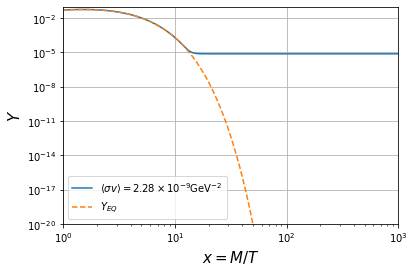

In [25]:
plt.loglog(x,yl, label = r'$\langle σ v\rangle = 2.28 \times 10^{-9} {\rm GeV}^{-2}$')
#plt.loglog(x,yl1, label = r'$\langle σ v\rangle = 1.74 \times 10^{-6} {\rm GeV}^{-2}$')
plt.loglog(x,Yeq(x), '--', label = '$Y_{EQ}$')
plt.ylim(ymax=0.1,ymin=1e-20)
plt.xlim(xmax=1e3,xmin=1)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y$', size= 15)
#plt.title('$M = 1$ TeV', size= 15)
plt.legend(loc='best',fontsize=10)
plt.grid(True)

## Equilibrium distribution

Here we consider thermal production of dark matter particles.
The equilibrium distribution of this particles is consider for the non-relativistic case, as follows (see eq 5.25):

$$Y_{EQ}(x) = \frac{45}{2\pi^{4}}\frac{g}{g_{*s}} x^{3/2} e^{-x} = 0.145\frac{g}{g_{*s}} x^{3/2} e^{-x}\,, $$

where $x = M / T$ and $M= 100$ GeV is the singlet mass taken as constant.

In [18]:
x=np.logspace( np.log10( xi) , np.log10( xe) ,npts  )

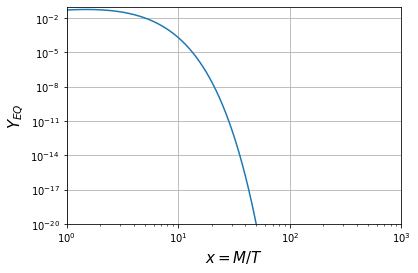

In [19]:
plt.loglog(x, Yeq(x))
plt.ylim(ymax=0.1,ymin=1e-20)
plt.xlim(xmax=1e3,xmin=1)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y_{EQ}$', size= 15)
plt.grid(True)

In [20]:
denr = 2.5e-10/sigmav[0]

In [21]:
denr

0.10943339060836432